In [2]:
import pandas as pd
from sklearn.svm import SVR 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data=df.drop(['category','parameter','mode','unit'], axis=1)   
data


,region,powertrain,year,value
0,Australia,BEV,2011,49
1,Australia,BEV,2012,170
2,Australia,PHEV,2012,80
3,Australia,PHEV,2013,100
4,Australia,BEV,2013,190
...,...,...,...,...
829,World,PHEV,2020,970000
830,World,PHEV,2021,1900000
831,World,BEV,2021,4600000
832,World,BEV,2022,7300000


In [3]:
# converting value column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df=data
data

,region,powertrain,year,value,log_value
0,Australia,BEV,2011,49,3.891820
1,Australia,BEV,2012,170,5.135798
2,Australia,PHEV,2012,80,4.382027
3,Australia,PHEV,2013,100,4.605170
4,Australia,BEV,2013,190,5.247024
...,...,...,...,...,...
829,World,PHEV,2020,970000,13.785051
830,World,PHEV,2021,1900000,14.457364
831,World,BEV,2021,4600000,15.341567
832,World,BEV,2022,7300000,15.803385


Getting encoded data for all countries in string

In [4]:
encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
encoded_data

,year,value,log_value,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,...,region_South Africa,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Kingdom,region_World,powertrain_BEV,powertrain_PHEV
0,2011,49,3.891820,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2012,170,5.135798,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2012,80,4.382027,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,100,4.605170,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2013,190,5.247024,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2020,970000,13.785051,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
830,2021,1900000,14.457364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
831,2021,4600000,15.341567,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
832,2022,7300000,15.803385,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


splitting for model training model input

In [5]:
x = encoded_data.drop(['log_value','value'], axis=1)
y = encoded_data[['log_value']]
x.shape

(834, 39)

using Support vector regression

In [6]:
model = SVR(kernel= 'linear')
model.fit(x,y)


c:\Users\risha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

predicting output for training data

In [7]:
# prediction of training data
train_prediction=model.predict(x)

R_squared error

In [8]:
#checking error of linear model with previous values
from sklearn import metrics

# Create DataFrame of predicted values
train_prediction = pd.DataFrame(train_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
train_prediction['value'] = train_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
# R squared Error
error_score = metrics.r2_score(data['value'], train_prediction['value'])
print("R squared Error : ", error_score)

R squared Error :  0.8555164733034619


In [9]:
print(train_prediction['value'])

0           73
1          120
2           84
3          140
4          199
        ...   
829    1771686
830    2927749
831    4163054
832    6879536
833    4838168
Name: value, Length: 834, dtype: int32


In [10]:
print(df['value'])

0           49
1          170
2           80
3          100
4          190
        ...   
829     970000
830    1900000
831    4600000
832    7300000
833    2900000
Name: value, Length: 834, dtype: int64


creating future dataset

In [11]:
# Extract the latest year from the dataset
latest_year = data['year'].max()

# Create a new DataFrame with future year, region, and powertrain
future_data = pd.DataFrame({
    'year': [latest_year + 1, latest_year + 2, latest_year + 3],
    'region': [data['region'].unique()[0]] * 3,
    'powertrain': [data['powertrain'].unique()[0]] * 3
})

In [12]:
# future_data=pd.DataFrame({'year': [2023,2024,2025],
#              'region': ['India','India','India'],
#              'powertrain': ['BEV','BEV','BEV']})
            

In [13]:
future_data

,year,region,powertrain
0,2023,Australia,BEV
1,2024,Australia,BEV
2,2025,Australia,BEV


In [14]:
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data

,year,value,log_value,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,...,region_South Africa,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Kingdom,region_World,powertrain_BEV,powertrain_PHEV
0,2023,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2024,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2025,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)

In [16]:
encoded_future_data

,year,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,region_Denmark,region_EU27,...,region_South Africa,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Kingdom,region_World,powertrain_BEV,powertrain_PHEV
0,2023,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2024,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2025,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Predict the values for future years
future_prediction = model.predict(encoded_future_data)

In [18]:
future_prediction

array([10.31912151, 10.82142372, 11.32372592])

In [19]:
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))

In [20]:
future_prediction

,log_values,value
0,10.319122,30306.621904
1,10.821424,50082.339378
2,11.323726,82762.133899


In [21]:
# Filter the DataFrame by powertrain for finding value using model for each PHEV and BEV
df_x_PHEV = data[data['powertrain'] == 'PHEV']
df_x_BEV = data[data['powertrain'] == 'BEV']

In [22]:
#finding prediction for previous years using model for PHEV and BEV seperately.
encoded_data_BEV = pd.get_dummies(df_x_BEV, columns=['region', 'powertrain'])
encoded_data_BEV
x_BEV = encoded_data_BEV.drop(['log_value','value'], axis=1)
y_BEV = encoded_data_BEV[['log_value']]
x_BEV['powertrain_PHEV']=fill_value=0
prev_data_predict_BEV= model.predict(x_BEV)
prev_data_predict_BEV.shape
x_BEV

,year,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,region_Denmark,region_EU27,...,region_South Africa,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Kingdom,region_World,powertrain_BEV,powertrain_PHEV
0,2011,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2015,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
827,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
828,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
831,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
#checking error of linear model with previous values
from sklearn import metrics

# R squared Error
# Create DataFrame of predicted values
prev_data_predict_BEV = pd.DataFrame(prev_data_predict_BEV, columns=['log_values'])
# Converting back to usable values from log_values using exp
prev_data_predict_BEV['value'] = prev_data_predict_BEV['log_values'].apply(lambda x: np.exp(x)).astype(int)

error_score = metrics.r2_score(df_x_BEV['value'], prev_data_predict_BEV['value'])
print("R squared Error : ", error_score)

R squared Error :  0.8923998648111505


In [24]:
df_x_BEV['value'], prev_data_predict_BEV['value']

(0           49
 1          170
 4          190
 5          370
 8          760
         ...   
 824    1400000
 827    1500000
 828    2000000
 831    4600000
 832    7300000
 Name: value, Length: 443, dtype: int64,
 0           73
 1          120
 2          199
 3          329
 4          544
         ...   
 438     922509
 439    1524466
 440    2519213
 441    4163054
 442    6879536
 Name: value, Length: 443, dtype: int32)

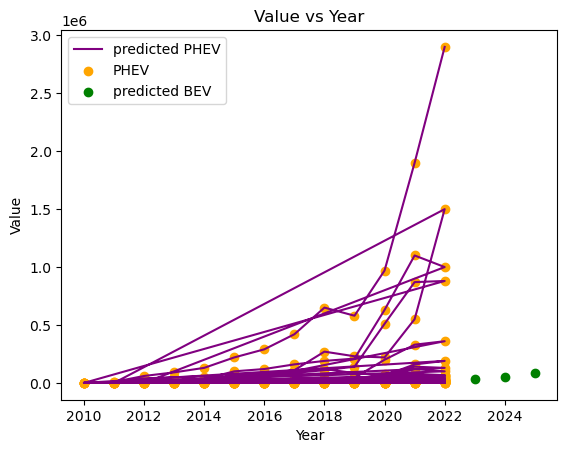

In [25]:

# Plotting new values for previous years
plt.plot(df_x_PHEV['year'], df_x_PHEV['value'],color='purple', label='predicted PHEV')
# plt.plot(df_x_BEV['year'], df_x_BEV['value'],color='green', label='predicted BEV')

#plotting old values for previous years
plt.scatter(df_x_PHEV['year'],df_x_PHEV['value'],color='orange', label='PHEV')
# plt.scatter(df_x_BEV['year'],prev_data_predict_BEV['value']['value'],color='blue',label='BEV')

#plotting for future years and future values
# plt.scatter(future_df_PHEV['year'], future_predicted_value_PHEV['value'],color='purple', label='predicted PHEV')
plt.scatter(future_data['year'], future_prediction['value'], color='green', label='predicted BEV')
# Set plot title and labels
plt.title('Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()

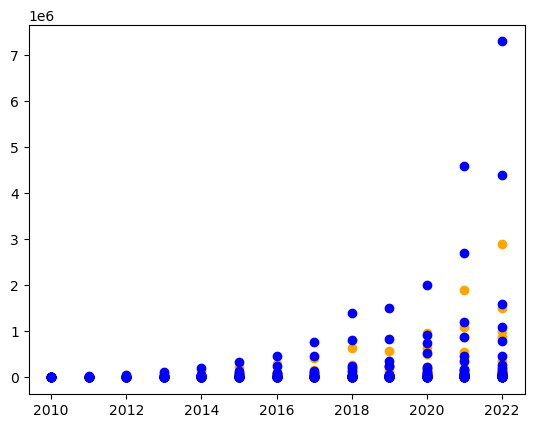

In [26]:
#plotting old values for previous years
plt.scatter(df_x_PHEV['year'],df_x_PHEV['value'],color='orange', label='PHEV')
plt.scatter(df_x_BEV['year'],df_x_BEV['value'],color='blue',label='BEV')

In [27]:
# Extract the latest year from the dataset 
latest_year = data['year'].max()

# Create a new DataFrame with future year, region, and powertrain
future_data = pd.DataFrame({
    'year': [latest_year + 1, latest_year + 2, latest_year + 3],
    'region': [data['region'].unique()[1]] * 3,
    'powertrain': [data['powertrain'].unique()[0]] * 3
})

In [28]:
future_data
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)

In [29]:
# Predict the values for future years
future_prediction = model.predict(encoded_future_data)
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))
future_prediction

,log_values,value
0,11.231118,75441.855996
1,11.733420,124669.276808
2,12.235722,206018.635604


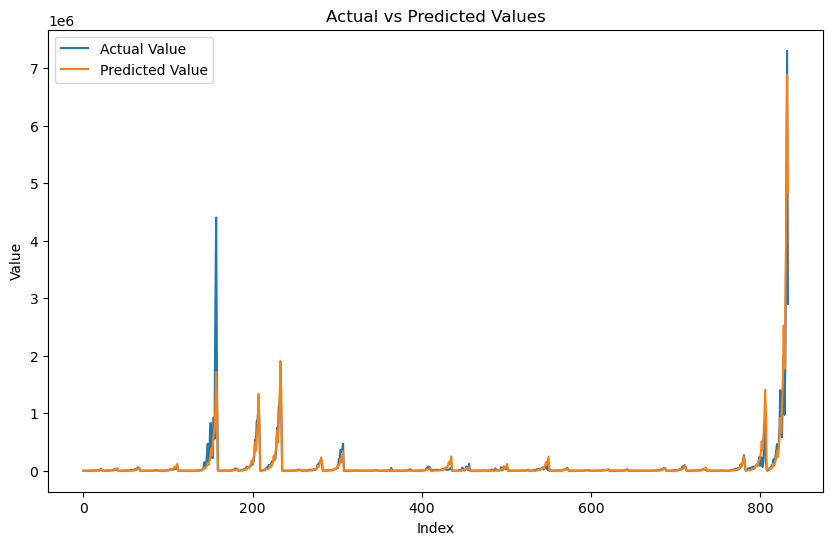

In [30]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(data.index, train_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()